# Advanced Algorithms Design

## Final assignment

Follow the example from [Bootcamp 4](https://www.youtube.com/watch?v=kHJLwfDUSWI&list=PL_wGNAk5B0pXq98BJBKsbNH2Qjp1lk8dG&index=31&ab_channel=WOMANIUM) for creating the quantum walk operator for the case of a circle with 4 nodes, and design the quantum walk operator for the case of a line with 16 nodes:

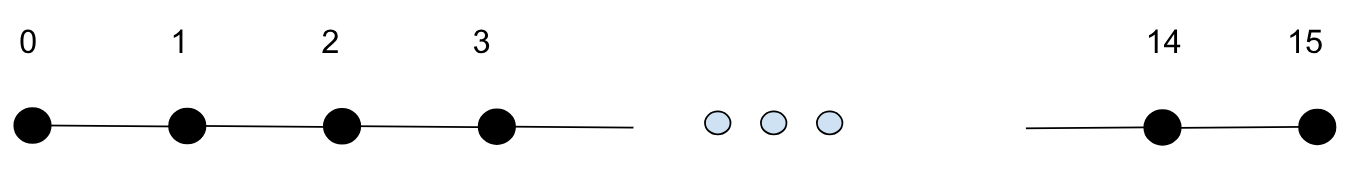

## Theory

### random walk on graph $G$

A random walk on a graph $G = (V, E)$ is a Markov Chain defined as follows:
- __States__ : each vertex of $G$ represents a state of the Markov Chain
- __Transition Probabilities__ : transition probability from vertex $u$ to the adjacent vertex $v$ is $1/d(u)$ where $d(u)$ is the degree of the vertex $u$ and if $d(u) = 0$ then all transition probabilities from $u$ to any vertices including itself would be $0$.

For our problem, we have 16 vertices which could be encoded woth 4 qubits; consequently, our Markov Chain states would be encoded by:

$$
\left\{ 
|0\rangle, 
|1\rangle, 
|2\rangle, 
\ldots, 
|15\rangle
\right\}
$$

where $|0\rangle = |0000\rangle$, $|1\rangle = |0001\rangle$, $|2\rangle = |0010\rangle$ and so forth.

### why do we study random walks

Random walks have a wide range of applications in different fields. In the field of Complexity theory, the decision problem of finding whether two verices $u$ and $v$ are connected in a graph $G$ is a [_complete problem_](https://en.wikipedia.org/wiki/Complete_(complexity)) for the class of [_logarithmic (L) space_ complexity](https://en.wikipedia.org/wiki/L_(complexity)) and this complete problem can be solved using random walk. The L space complexity class is the calss of problems whose space (memory) requirements for input data encoding increases logarithmically with input data size. A complete problem in the L space class is amongst the hardest problems in that class and if one could prove that a complete problem is solvable, it means that all problems in that class are solvable.

### space-bounded Quantum Turing Machine

A Quantum Turing Machine (QTM) is a machine that performs a computation by operating on qubits using Unitary transformations. Since the qubits could exist in superposition states, a QTM could follow multiple computation paths simultaneously of course with a relevant algorithm. A clear example of achieving such Quantum Parallelism is Grover's search algorithm.
- The algorithm initializes with a superposition of all possible states (input values of $f(x)$ encoded as $2^n$ base kets $|x\rangle$)
  $$
  | \psi_0 \rangle = H^{\otimes n} |0\rangle^{\otimes n} = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle
  $$
- The quantum oracle $U_f$ modifies $|\psi_0 \rangle$ to induce phase-kickbacks on the marked elements $x$ for which $f(x) = 1$
  $$
  U_f | \psi_0 \rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} (-1)^{f(x)} |x\rangle
  $$
- The Diffusion operator $U_s$ then amplifies the amplitudes of the marked elements by operating on the specific $U_f |\psi_0\rangle$ state. The impact of $U_s$ on the expansion coefficients of $U_f |\psi_0\rangle$ is to increase the coefficients of marked elements around the mean value of coefficients by a value of order $1/\sqrt{N}$ and to reduce the coefficients of unmarked elements by the same value.The mean value for our specific $U_f |\psi_0\rangle$ (which contains all possible base kets within its expansion) could be found applying $( 1/\sqrt{N} ) U_f |\psi_0\rangle \langle 0| H^{\otimes n}$ on $U_f |\psi_0\rangle$. The diffusion operator for the original version of Grover's search approximately calculates the mean value an is as follows:
  $$
  U_s = 2|\psi_0\rangle \langle \psi_0| - I = H^{\otimes n} (2|0\rangle \langle 0| - I) H^{\otimes n}
  $$

A space-bound QTM is a QTM that has restrictions on the amount of space (memory) used during computation. These would include restrictions on the input size being processed at each step as well as the records of the previous results. 

### quantum random walk

In order to create the quantum analogous of random walk after we have encoded vertices as the basis kets of a Hilbert space of logarithmic dimension, one has to find a unitary operator that operates on a specific vertex $|j\rangle$ and generates the right sequence of probability amplitudes for a walk between two arbitrary nodes in the graph. A first choice for these probability amplitudes would be:
$$
| \langle j | \partial_j \rangle| ^2 = \frac{1}{d_j}
$$
where $d_j$ os the degree of the vertex $j$. However, obtaining a unitary operator that would transform $|j\rangle$ to $|\partial_j\rangle$ is not in general possible even by introducing  state-dependent phases. To elaborate this point, consider the following expansion for $|\partial_j\rangle$:
$$
|\partial_j\rangle = \frac{1}{\sqrt{d_j}} \sum_{k:(j,k) \in E} \exp(i\phi_{jk})|k\rangle.
$$ 

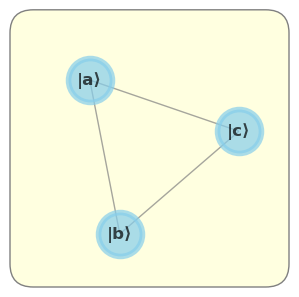

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

G = nx.Graph()
G.add_nodes_from(['|a⟩', '|b⟩', '|c⟩'])
G.add_edges_from([('|a⟩', '|b⟩'), ('|b⟩', '|c⟩'), ('|c⟩', '|a⟩')])

fig, ax = plt.subplots(figsize=(3, 3))

frame = patches.FancyBboxPatch((0, 0), 1, 1, boxstyle="round,pad=0.1", edgecolor='gray', linewidth=1, facecolor='lightyellow', transform=ax.transAxes, clip_on=False)
ax.add_patch(frame)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=12, font_color='black', font_weight='bold', edge_color='gray', linewidths=4, alpha=0.7, ax=ax)

ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-1.3, 1.3)
ax.axis('off')

plt.show()


Calculating $\langle \partial_a | \partial_b \rangle$ for the above situation, in which two nodes $|a\rangle$ and $|b\rangle$ share ONLY one adjacent node $|c\rangle$, would result in :
$$
\langle \partial_a | \partial_b \rangle = \exp{ (i \delta_{ab})} \neq 0,\quad \delta_{ab} = \phi_{ac} - \phi_{bc} .
$$
This clearly breaks down the orthogonality of $|a\rangle$ and $|b\rangle$ after their transformation into $|\partial_a\rangle$ and $|\partial_b\rangle$ <span style="color: red;">even in the presence of tunable phases</span>.

A recipe for this could be obtained by sticking to an un-phased $|\partial_j\rangle$
$$
|\partial_j\rangle = \frac{1}{\sqrt{d_j}} \sum_{k:(j,k) \in E} |k\rangle ,
$$
and formulating quantum random walk using two registers $|j, k\rangle = |j\rangle \otimes |k\rangle$ instead of one. First, we introduce the operator $C$ which acts like a coin flip to shift the second register $|k\rangle>$ towards $( 2/\sqrt{d_j}) |\partial_j\rangle - |k\rangle$ and at the same time keeping the first register $|j\rangle$ unchanged :
$$
C := \sum_{j \in V} | j \rangle\langle j | \otimes \left( 2 |\partial_j\rangle\langle\partial_j| - I \right) .
$$
The second registered is transformed, using a diffusion operator, into a superposition of all adjacent vertices of $|j\rangle$ with positive coefficients of $2/d_j$ with the exception of the vertex $|k\rangle$ whose coefficient has been negated or zeroed out ( when $d_j = 2$ ) to be __marked__ as the direction of this step of the walk.

At the end of each step of the walk, we have departed from the first register to the second one; henceforth, the first and second registers should be swapped using the operator $S$ :
$$
S := \sum_{(k,j) \in E} |k, j \rangle\langle j, k|
$$

As an example, lets follow two steps of the walk to confirm that the sequence of probabilities are properly captured by the unitary operator $SC$. The first step is formulated as :
$$
SC |j, k\rangle = \frac{2}{\sqrt{d_j}} |\partial_j, j\rangle - |k, j\rangle
$$
Now for the second step, it is like we have a superposition of all neighbors of $|j\rangle$ as the first register as we expected and therefor the probability space of the random walk is accurately expanding in the right directions while at the same time marking the direction of each step of the walk by subtracting that node from the neighbors superpositions :
$$
\begin{split}
C |\partial_j, j\rangle &= \frac{1}{\sqrt{d_j}} \sum_{l: (j, l) \in E} C |l, j\rangle = \frac{1}{\sqrt{d_j}} \sum_{l: (j, l) \in E} \left[\;|l\rangle\langle l | \otimes (2 |\partial_l \rangle\langle \partial_l | - I )\;\right]\;\;|l, j\rangle = \left( \sum_{l: (j, l) \in E} \frac{2}{\sqrt{d_j d_l}} |l, \partial_l\rangle \right) - \underline{|\partial_j, j\rangle} \\
C |k, j\rangle &= \frac{2}{\sqrt{d_k}} | k, \partial_k \rangle - \underline{|k, j\rangle}
\end{split}
$$

As expected, in the next step of the walk, we are dealing with the propagation of the walk to neighbors of the neighbors of the initial vertex $|j\rangle$ including itself as one of the neighbors of the neighbors. Specifically, the underlined terms _mark_ return to $|j\rangle$

## Implementation in Classiq

In [19]:
# Execute this cell if you are not already authenticated
# and do not have a valid API token
import os
import classiq
classiq.authenticate()

For the problem in hand 16 nodes of the graph are to be encoded as qubits. As mentioned before, the space requirements for this is logarithmic.

In [20]:
import numpy as np

from classiq import *

from classiq.execution import ExecutionPreferences

from classiq.qmod.symbolic import logical_or, logical_and

size = 4

### control-diffusion operator $C$

It is possible to write down the diffuser (_coin flip_) part of the operator $C$ in terms of the __zero state diffuser__ operator $( 2 |0 \rangle\langle 0| - I )$ using $U_j |0\rangle = |\partial_j\rangle$ :
$$
2 |\partial_j\rangle\langle\partial_j | - I = U_j (2 |0\rangle\langle 0 | - I) U^{\dagger}_j.
$$
An implementation of `zero_diffuzer(x: QNum)` which induces phase kickback on non-$|0\rangle$ states could be achieved utilizing an oracle.
$$
U_f |x\rangle |-\rangle = \frac{1}{\sqrt{2}} \left(U_f |x\rangle|0\rangle - U_f |x\rangle|1\rangle \right) = \frac{1}{\sqrt{2}} \left( |x\rangle|0 \oplus f(x)\rangle - |x\rangle|1 \oplus f(x)\rangle \right) = (-1)^{f(x)} |x\rangle |-\rangle
$$

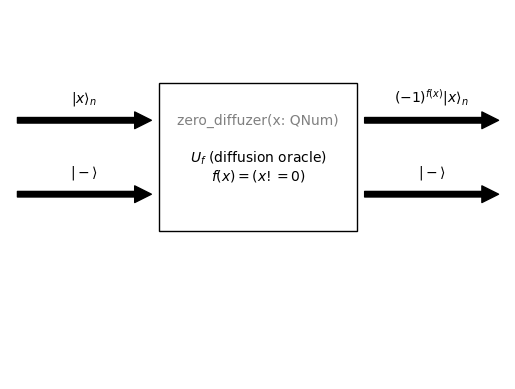

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots()

rect = patches.Rectangle((0.3, 0.4), 0.4, 0.4, linewidth=1, edgecolor='black', facecolor='none')
ax.add_patch(rect)
plt.text(0.5, 0.7, 'zero_diffuzer(x: QNum)', horizontalalignment='center', verticalalignment='center', color='gray')
plt.text(0.5, 0.6, r'$U_f$ (diffusion oracle)', horizontalalignment='center', verticalalignment='center')
plt.text(0.5, 0.55, r'$f(x) = ( x != 0 )$', horizontalalignment='center', verticalalignment='center')

ax.annotate('', xy=(0.3, 0.7), xytext=(0.0, 0.7), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(0.3, 0.5), xytext=(0.0, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(1.0, 0.7), xytext=(0.7, 0.7), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('', xy=(1.0, 0.5), xytext=(0.7, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))

plt.text(0.15, 0.75, r'$|x\rangle_n$', horizontalalignment='center')
plt.text(0.15, 0.55, r'$|-\rangle$', horizontalalignment='center')
plt.text(0.85, 0.75, r'$(-1)^{f(x)}|x\rangle_n$', horizontalalignment='center')
plt.text(0.85, 0.55, r'$|-\rangle$', horizontalalignment='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

plt.show()

Classiq deployment of the `zero_diffuzer` machinery would be as follows:

In [22]:
@qfunc
# this function prepares the |-> state as 
# the target (aux) qubit for the oracle
def prepare_minus(x: QBit):
    X(x)
    H(x)

    
@qfunc
# this function does aux XOR (x !=0 ) to generate 
# 0 when (aux = 0, x = 0) or (aux = 1, x ~= 0) and 
# 1 when (aux = 1, x = 0) or (aux = 0, x ~= 0)
def diffuzer_oracle(aux: Output[QNum], x: QNum):
    aux ^= (x != 0)


@qfunc
# this is the whole phase kick-back machine to 
# induce a minus sign for non-zero states
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1, aux)
    within_apply(compute = lambda: prepare_minus(aux),
                 action = lambda: diffuzer_oracle)

Now for the full $C$ operator we need to make sure that $U_j$ is related to the first register $|j\rangle$ using the control operator $|j\rangle\langle j|$ and also to iterate through all vertices. This would be achieved using the following snippet of code.

In [23]:
def W_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):
    # prepare amplitudes for |\partial_i> states
    prob = np.zeros(2**size)
    if i == 0:
        prob[i + 1] = 1.0
    elif i == 15:
        prob[i - 1] = 1.0
    else:    
        prob[i + 1] = 0.5
        prob[i - 1] = 0.5
    print(f'State = {i}, prob vec = {prob}')
    
    # control vertex is |i> itself and action 
    # is the diffusion of the second register, 
    # i.e. adjacent vertices of |i>
    control(ctrl = vertices == i,
            operand = lambda: within_apply(
                compute = lambda: inplace_prepare_state(probabilities = prob.tolist(), bound = 0.01, target = adjacent_vertices),
                action = lambda: zero_diffuzer(adjacent_vertices)))


@qfunc 
def W_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(2**size):
        W_iteration(i, vertices, adjacent_vertices)

### swap operator $S$ implementation

The challenge to deploy the $S$ operator is mainly related to the sum over $(j, k) \in E$, i.e. to identify and sum over connected vertices. For this, the variable `res` is used as a control variable to check if two vertices are connected in `edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum)`. Using this ctrl variable in `S_operator(vertices: QNum, adjacent_vertices: QNum)`, a bitwise swap is applied to $|j\rangle$ and $|k\rangle$ if `edge_oracle(res, j, k)` generates 1 for `res`.

In [24]:
@qfunc
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    # in the case of the linear graph of our problem,
    # |0> and |15> are not connected.
    # -----------------------------------------------
    # it seems that formulating res using the modulo
    # operator leads to better width and depth
    # -----------------------------------------------
    #res |= logical_or((vertices - adjacent_vertices == 1), (adjacent_vertices - vertices == 1))
    res |= logical_or((vertices - adjacent_vertices) % 16 == 1, (adjacent_vertices - vertices) % 16 == 1)


@qfunc 
def bitwise_swap(x: QArray[QBit], y: QArray[QBit]):
    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i],y[i]))
  

@qfunc 
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res, vertices, adjacent_vertices)
    control(ctrl = res == 1,
        operand= lambda: bitwise_swap(vertices, adjacent_vertices))

## implementing `main` and creating the program

Now the sequence of operations on the two registers $|j, k\rangle$ in which $|j\rangle$ and $|k\rangle$ are adjacent vertices could be coded in the `main(vertices:Output[QNum], adjacent_vertices:Output[QNum])` qfunc as follows:

In [25]:
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):

  allocate(size, vertices)
  hadamard_transform(vertices)
  allocate(size, adjacent_vertices)

  W_operator(vertices, adjacent_vertices)
  S_operator(vertices, adjacent_vertices)

And finally, the program could be synthesized (depth of the normally synthesized circuit exceeds 25).

In [26]:
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

State = 0, prob vec = [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
State = 1, prob vec = [0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
State = 2, prob vec = [0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
State = 3, prob vec = [0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
State = 4, prob vec = [0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
State = 5, prob vec = [0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0. ]
State = 6, prob vec = [0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
State = 7, prob vec = [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0.  0. ]
State = 8, prob vec = [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
State = 9, prob vec = [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
State = 10, prob vec = [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
State = 11, prob vec = [0.  0.  0.  0.  0.  0. 